Задача 1. A/B–тестирование

Проведен эксперимент в ходе которого пользователи были разбиты на две группы:  

Контрольная группа - базовая механика оплаты услуг на сайте (группа A)  Целевая группа - новая механика оплаты услуг на сайте (группа B)

Необходимо проанализировать итоги эксперимента и сделать вывод, стоит ли запускать новую механику оплаты на всех пользователейДанные:groups - информация о принадлежности пользователя к контрольной или экспериментальной группе (А – контроль, B – целевая)groups_add - доп. пользователи, которых прислали спустя 2 дня после передачи данныхactive_studs - информация о пользователях, которые зашли на платформу в дни проведения экспериментаchecks - информация об оплатах пользователей в дни проведения эксперимента

In [4]:
import pandas as pd
import numpy as np 
import pingouin as pg 

import matplotlib.pyplot as plt

from scipy.stats import chi2_contingency


from tqdm import tqdm
from scipy.stats import norm

In [4]:
groups_user = pd.read_csv(('/mnt/HC_Volume_18315164/home-jupyter/'
                          'jupyter-d-spiridonov/first_project/Проект_2_groups.csv'), 
                          sep=";")
# файл с информацией о принадлежности пользователя к контрольной или экспериментальной группе 
# (А – контроль, B – целевая группа) 

In [6]:
groups_user.shape

(74484, 2)

In [7]:

groups_user.dtypes

id      int64
grp    object
dtype: object

In [8]:
groups_user.id.nunique()

74484

In [9]:
groups_user

,id,grp
0,1489,B
1,1627,A
2,1768,B
3,1783,B
4,1794,A
...,...,...
74479,5692459,B
74480,5692572,B
74481,5692865,B
74482,5693667,B


In [5]:
groups_user_after_2 = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/'
                                  'jupyter-d-spiridonov/first_project/Проект_2_group_add.csv')
# дополнительный файл с пользователями, который  прислали спустя 2 дня после передачи данных

In [10]:
groups_user_after_2.id.nunique()

92

In [11]:
groups_user_after_2

,id,grp
0,5694584,B
1,5694830,B
2,5695057,B
3,5698872,B
4,5699067,B
...,...,...
87,200247820,B
88,201032527,B
89,201067612,B
90,201067653,B


In [13]:
active_studs = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-d-spiridonov/first_project/Проект_2_active_studs.csv')
# файл с информацией о пользователях, которые зашли на платформу в дни проведения эксперимента. 

In [14]:
active_studs.dtypes

student_id    int64
dtype: object

In [15]:
active_studs.shape

(8341, 1)

In [16]:
active_studs.student_id.nunique()

8341

In [17]:
active_studs = active_studs.rename(columns={'student_id': 'id'}) # переименовал для удобства название колонки 

In [18]:
active_studs

,id
0,581585
1,5723133
2,3276743
3,4238589
4,4475369
...,...
8336,1794344
8337,296883
8338,3598448
8339,3610547


In [19]:
cheks_user = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/'
                         'jupyter-d-spiridonov/first_project/Проект_2_checks.csv', sep=";")
# файл с информацией об оплатах пользователей в дни проведения эксперимента. 

In [20]:
cheks_user.shape

(541, 2)

In [21]:
cheks_user.student_id.nunique()

541

In [19]:
cheks_user=cheks_user.rename(columns={'student_id': 'id'})
cheks_user

,id,rev
0,1627,990.0
1,3185,690.0
2,25973,690.0
3,26280,690.0
4,100300,990.0
...,...,...
536,5645737,1900.0
537,5651566,1900.0
538,5662322,1900.0
539,5681918,1900.0


Так как у нас имеются юзеры и их сумма их покупок, то можно посмотреть повлияла ли новая механика оплаты на:
1. Конверсию в покупку у двух наших гипотез. 

2. Среднюю выручку с одного пользователя, который совершил оплату(ARPPU)

После предварительного анализа csv-файлов и их обработки нужно будет смерджить их

Дополним groups_user данными, которые пришли нам через 2 дня(groups_user_after_2)

In [20]:
groups_user_all=groups_user.append(groups_user_after_2)
groups_user_all.shape[0]

74576

In [21]:
groups_user_all.id.nunique() # посмотрел уникальные значения 

74576

Теперь из groups_user_all отберем  пользователей, которые зашли на момент  эксперимента(active_studs)

In [22]:
experemnt_users=active_studs.merge(groups_user_all, on='id', how='left')

In [23]:
experemnt_users

,id,grp
0,581585,A
1,5723133,A
2,3276743,B
3,4238589,A
4,4475369,B
...,...,...
8336,1794344,B
8337,296883,B
8338,3598448,B
8339,3610547,B


In [24]:
experemnt_users.id.nunique()#посмотрел количества уникальных значений

8341

Найдем дф с пользователями, которые учавствовали в тесте и при этом совершили оплату

In [25]:
check_experement_users=cheks_user.merge(groups_user_all, how='left')

In [26]:
check_experement_users['rev_d']=check_experement_users.rev#создадим колонку такую же колонку и вместо суммы покупок поставим  'Yes'
check_experement_users['rev_d']='Yes'
check_experement_users

,id,rev,grp,rev_d
0,1627,990.0,A,Yes
1,3185,690.0,B,Yes
2,25973,690.0,B,Yes
3,26280,690.0,B,Yes
4,100300,990.0,B,Yes
...,...,...,...,...
536,5645737,1900.0,B,Yes
537,5651566,1900.0,B,Yes
538,5662322,1900.0,B,Yes
539,5681918,1900.0,B,Yes


In [27]:
check_experement_users.id.nunique()#проверил на всякий случай

541

И теперь обЪединим наши 2 получившиеся таблицы


In [28]:
all_data=check_experement_users.merge(experemnt_users, how='outer')
all_data

,id,rev,grp,rev_d
0,1627,990.0,A,Yes
1,3185,690.0,B,Yes
2,25973,690.0,B,Yes
3,26280,690.0,B,Yes
4,100300,990.0,B,Yes
...,...,...,...,...
8485,264371,NaN,B,NaN
8486,1794344,NaN,B,NaN
8487,296883,NaN,B,NaN
8488,3598448,NaN,B,NaN


In [29]:
all_data.nunique()

id       8490
rev        39
grp         2
rev_d       1
dtype: int64

In [30]:
all_data

,id,rev,grp,rev_d
0,1627,990.0,A,Yes
1,3185,690.0,B,Yes
2,25973,690.0,B,Yes
3,26280,690.0,B,Yes
4,100300,990.0,B,Yes
...,...,...,...,...
8485,264371,NaN,B,NaN
8486,1794344,NaN,B,NaN
8487,296883,NaN,B,NaN
8488,3598448,NaN,B,NaN


In [31]:
all_data_2=all_data[['id', 'grp', 'rev_d']]#отобрал те колонки с которыми буду работать

In [32]:
all_data_2=all_data_2.fillna("Nope")


In [33]:
all_data_2

,id,grp,rev_d
0,1627,A,Yes
1,3185,B,Yes
2,25973,B,Yes
3,26280,B,Yes
4,100300,B,Yes
...,...,...,...
8485,264371,B,Nope
8486,1794344,B,Nope
8487,296883,B,Nope
8488,3598448,B,Nope


In [34]:
all_data_2.rev_d.value_counts()

Nope    7949
Yes      541
Name: rev_d, dtype: int64

In [35]:
df=all_data_2.groupby(['grp', 'rev_d'], as_index=False).agg({'id':'count'})#посчитал какое количество пользователей находиться в каждом сегменте

In [36]:
df_pivot=df.pivot(index='grp', columns='rev_d', values='id')#создал сводную таблицу для удобства (Nope-без покупки, Yes-с покупкой)

In [37]:
df_pivot

rev_d,Nope,Yes
grp,,
A,1460,107
B,6489,434


In [38]:
df_pivot['cr']=((df_pivot.Yes/(df_pivot.Nope+df_pivot.Yes))*100).round(2)# рассчитал конверсию для каждого эксперимента


In [39]:
df_pivot


rev_d,Nope,Yes,cr
grp,,,
A,1460,107,6.83
B,6489,434,6.27


Как видим Cr сильно не отличаются друг от друга. 
Чтобы не осталось никаких сомнений сверим их статистические показатели с помощью метода Хи-квадрат, т.к. мы имеем дело с категориальными переменными.H0-новая механика не повлияла на конверсию покупок, соотвественно Н1-значительно повлияла на конверсию покупок. Уровень значимости возьмем 0.05. Если p-value< 0.05 то отвергаем Н0, если больше то принеимаем Н0

In [40]:
df_pivot
del df_pivot['cr'] #удалил колонку cr чтобы провести эксперимент


In [41]:
df_pivot

rev_d,Nope,Yes
grp,,
A,1460,107
B,6489,434


In [42]:

stat, p, dof, expected = chi2_contingency(df_pivot)

In [43]:
stat, p

(0.579666003588264, 0.4464432666411111)

In [44]:
prob = 0.95
alpha = 1.0 - prob
if p <= alpha:
    print('Отклоняем H0')
else:
    print('Не отклоняем H0')

Не отклоняем H0


Как видим по результату данного теста p-value>0.05 поэтому Н0 мы не отвергаем:Новая механика оплаты никак не повлияла на количество покупок

Теперь сравним показатели ARPPU.
Возьмем наш готовый датафрейм, в которых отмеченны пользователи, которые совершили покупки.

In [45]:
check=check_experement_users.groupby( 'grp', as_index=False).agg({'rev': ('count', 'mean')})
#

In [46]:
check

grp   rev             
      count         mean
0   A   107   860.710280
1   B   434  1108.824893

В средним чеке есть существенные различия в пользу новой механики оплаты услуги. Проведем тест и узнаем значимые ли различия или нет

Построим гистограммы распределения по каждой группе

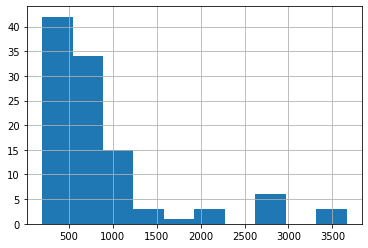

In [47]:
check_experement_users.query('grp=="A"').rev.hist()#Гистограмма со старым способом оплаты

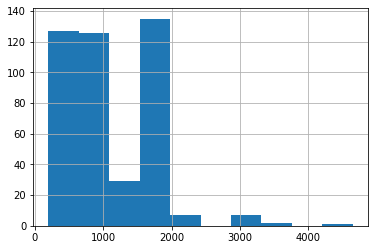

In [48]:
check_experement_users.query('grp=="B"').rev.hist()#Гистограмма с новым пользователем оплаты 

In [58]:
#проверим наше распределение на нормальность 
pg.normality(data = check_experement_users, dv = "rev", group = "grp", method = "normaltest")

,W,pval,normal
A,52.218452,4.580439e-12,False
B,33.195875,6.188814e-08,False


как видим из результатов наши распределения не являются нормальными.

Для сравнения средних применим Бутстреп. Т.к. он предоставляет более точную оценку статистических параметров, чем традиционные методы, основанные на предположениях о распределении. Еще одним преимуществом бутстрепа является его применимость к широкому диапазону статистических методов и возможность его использования для оценки точности и надежности многих различных оценок.Можно также провести т-тест. Т.к. у нас распределения ненормальные, то результаты проведения теста будут менее точными и надежными. Т-тест можно использовать, если распределение похоже на нормальное.
H0-никаких измений не произошло(Между старым способом оплаты и новым нет значимых различий)
H1-есть значимые различия 
p-value<0.5-отвергаем H0

In [59]:
def get_bootstrap(
    data_column_1, # числовые значения первой выборки
    data_column_2, # числовые значения второй выборки
    boot_it = 1000, # количество бутстрэп-подвыборок
    statistic = np.mean, # интересующая нас статистика
    bootstrap_conf_level = 0.95 # уровень значимости
):
    boot_data = []
    for i in tqdm(range(boot_it)): # извлекаем подвыборки
        samples_1 = data_column_1.sample(
            len(data_column_1), 
            replace = True # параметр возвращения
        ).values
        
        samples_2 = data_column_2.sample(
            len(data_column_1), 
            replace = True
        ).values
        
        boot_data.append(statistic(samples_1)-statistic(samples_2)) # mean() - применяем статистику
        
    pd_boot_data = pd.DataFrame(boot_data)
        
    left_quant = (1 - bootstrap_conf_level)/2
    right_quant = 1 - (1 - bootstrap_conf_level) / 2
    quants = pd_boot_data.quantile([left_quant, right_quant])
        
    p_1 = norm.cdf(
        x = 0, 
        loc = np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_2 = norm.cdf(
        x = 0, 
        loc = -np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_value = min(p_1, p_2) * 2
        
    # Визуализация
    _, _, bars = plt.hist(pd_boot_data[0], bins = 50)
    for bar in bars:
        if bar.get_x() <= quants.iloc[0][0] or bar.get_x() >= quants.iloc[1][0]:
            bar.set_facecolor('red')
        else: 
            bar.set_facecolor('grey')
            bar.set_edgecolor('black')
    
    plt.style.use('ggplot')
    plt.vlines(quants,ymin=0,ymax=50,linestyle='--')
    plt.xlabel('boot_data')
    plt.ylabel('frequency')
    plt.title("Histogram of boot_data")
    plt.show()
       
    return {"boot_data": boot_data, 
            "quants": quants, 
            "p_value": p_value}

100%|██████████| 1000/1000 [00:00<00:00, 5436.42it/s]


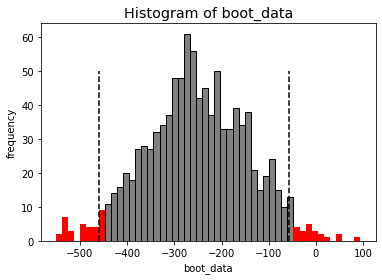

p_value: 0.01769567932552268
quants:                 0
0.025 -459.415666
0.975  -56.276409


In [65]:
booted_data_mean = get_bootstrap(check_experement_users.query('grp == "A"').rev,
                                      check_experement_users.query('grp == "B"').rev)

print("p_value:", booted_data_mean["p_value"])
print("quants:", booted_data_mean["quants"])

Бутстреп анализ  показывает значимое различие средних значений у экспериментальных групп, поэтому отвергаем Н0

Вывод: 
Чтобы понять сработала ли новая механика оплаты или нет я обратился к следующим метрикам: CR(Конверсия в покупку) и ARPPU(Средний доход на платящего пользователя )
1)Для того чтобы понять как новая механика оплаты повлияла на CR я использовл метод Хи-квадрат, т.к. я имел дело с категоральными переменными. 
По результатам теста было видно СR старого способа значительно не отличился от нового способа оплаты , вследствие этого делаем вывод что новую механику оплаты внедрять не стоит. 
2)Для того чтобы понять как новая механика оплаты повлияла на ARPPU я использовал Бутстреп, который показал значимые различия между старым и новым способом оплаты.Вследстивие чего делается вывод, что нам нужно запускать новую механику оплаты
Подытожим: основываясь на проведенном анализе можно принять решение о запуске новой механики на всех пользователей. При этом в дальнейшем я рекомендую следить за метриками CR и ARPPU. Особенно за коэффициентом конверсии перехода к оплате. Возможно она может проявить себя через определенный промежуток времени.